In [1]:
import pandas as pd
import alphalens as al
import numpy as np
from datetime import datetime
import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%run get_data.ipynb

## Alpha026 (-1*ts_max(correlation(ts_rank(volume,5),ts_rank(high, 5), 5), 3))

## 1.整理原始数据

In [4]:
price_data=(kline_data[['asset', 'high_price', 'date']].pivot_table(values='high_price',index='date',columns='asset')/10000).sort_index()
volume_data=(kline_data[['asset', 'volume', 'date']].pivot_table(values='volume',index='date',columns='asset')).sort_index()

In [5]:
price_data.head()

asset,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,873122.BJ,873132.BJ,873152.BJ,873167.BJ,873169.BJ,873223.BJ,873305.BJ,873339.BJ,873527.BJ,873576.BJ
date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,19.10,28.40,21.19,2.53,5.64,6.27,2.55,7.93,4.30,12.25,...,NaN,NaN,3.25,NaN,4.0,NaN,NaN,60.0,10.98,NaN
2021-01-05,18.48,27.93,21.08,2.52,5.52,5.75,2.67,7.88,4.11,11.95,...,NaN,NaN,3.25,NaN,4.0,NaN,5.70,60.0,10.98,NaN
2021-01-06,19.56,28.75,20.85,2.48,5.45,5.34,2.72,7.83,4.20,12.14,...,NaN,NaN,3.25,NaN,4.0,NaN,5.70,60.0,10.98,NaN
2021-01-07,19.98,29.50,20.04,2.43,5.45,4.57,2.68,7.89,4.20,12.18,...,NaN,NaN,3.25,NaN,4.0,NaN,5.70,60.0,10.98,NaN
2021-01-08,20.10,29.45,19.49,2.38,5.30,4.11,2.58,7.60,4.02,11.58,...,NaN,NaN,3.25,NaN,4.0,NaN,6.66,60.0,10.98,NaN


In [6]:
volume_data.head()

asset,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,873122.BJ,873132.BJ,873152.BJ,873167.BJ,873169.BJ,873223.BJ,873305.BJ,873339.BJ,873527.BJ,873576.BJ
date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,155421643.0,146844133.0,2739801.0,4896339.0,8132668.0,850900.0,13795696.0,81454236.0,18829709.0,7027182.0,...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN
2021-01-05,182135210.0,116265838.0,2304905.0,10317710.0,8532533.0,71435766.0,33215803.0,57578742.0,9823110.0,6146690.0,...,NaN,NaN,0.0,NaN,0.0,NaN,10000.0,0.0,0.0,NaN
2021-01-06,193494512.0,104880129.0,3183310.0,14822400.0,7183377.0,23693705.0,58454361.0,54967260.0,11326500.0,6987253.0,...,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,NaN
2021-01-07,158418530.0,122675574.0,4119880.0,9987378.0,10809106.0,6509500.0,34215256.0,82901381.0,9650301.0,13653804.0,...,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,NaN
2021-01-08,119547322.0,102856329.0,3841505.0,6593996.0,9108084.0,3607400.0,19792300.0,57526129.0,8790300.0,9798260.0,...,NaN,NaN,0.0,NaN,0.0,NaN,3101.0,0.0,0.0,NaN


## 2.定义函数

In [7]:
from scipy.stats import rankdata
def correlation(x,y,window=10):
    return x.rolling(window).corr(y)
def rolling_rank(na):
    return rankdata(na)[-1]
def ts_rank(df,window=10):
    return df.rolling(window).apply(rolling_rank)
def ts_max(df,window=10):
    return df.rolling(window).max()

## 3.计算因子

In [8]:
factor_data=correlation(ts_rank(volume_data,5),ts_rank(price_data,5),5)

In [9]:
factor_data=factor_data.replace([-np.inf,np.inf],0).fillna(value=0)

In [10]:
factor_data=-1*ts_max(factor_data,3)

In [11]:
factor_data=factor_data.stack()
factor_data

date        asset    
2021-01-06  000001.SZ   -0.000000
            000002.SZ   -0.000000
            000004.SZ   -0.000000
            000005.SZ   -0.000000
            000006.SZ   -0.000000
                           ...   
2021-12-31  873223.BJ   -0.000000
            873305.BJ   -0.116927
            873339.BJ    0.534522
            873527.BJ   -0.342997
            873576.BJ   -0.486639
Length: 1166199, dtype: float64

In [12]:
factor_data = factor_data.reset_index()
factor_data.rename(columns={0:'factor'}, inplace=True)
factor_data.head()

,date,asset,factor
0,2021-01-06,000001.SZ,-0.0
1,2021-01-06,000002.SZ,-0.0
2,2021-01-06,000004.SZ,-0.0
3,2021-01-06,000005.SZ,-0.0
4,2021-01-06,000006.SZ,-0.0


## 4.合并数据

In [13]:
kline_data = kline_data.merge(share_data, on=['asset', 'date'])
kline_data['tcap'] = kline_data['close_price'] * kline_data['circulation_a']/10000
factor_data = factor_data.merge(kline_data[['asset', 'date', 'tcap', 'open_price', 'high_price', 'low_price', 'close_price', 'volume']], on=['asset', 'date'])
factor_data.head()
factor_data.shape[0]

1052306

In [14]:
factor_data = factor_data.merge(indus_data[['asset', 'date', 'first_industry_code']], on=['asset', 'date'])
factor_data=factor_data.merge(st_data[['asset','date','st']],on=['asset','date'])

## 5.剔除ST股票

In [15]:
factor_data = factor_data[factor_data['st'] != 1]
factor_data.head()

,date,asset,factor,tcap,open_price,high_price,low_price,close_price,volume,first_industry_code,st
0,2021-01-06,000001.SZ,-0.0,3.795765e+11,180800.0,195600.0,180000.0,195600.0,193494512.0,40,0
1,2021-01-06,000002.SZ,-0.0,2.792866e+11,278000.0,287500.0,277300.0,287500.0,104880129.0,42,0
2,2021-01-06,000004.SZ,-0.0,1.680052e+09,207300.0,208500.0,200200.0,200200.0,3183310.0,35,0
3,2021-01-06,000005.SZ,-0.0,2.539071e+09,24700.0,24800.0,23900.0,24000.0,14822400.0,20,0
4,2021-01-06,000006.SZ,-0.0,7.253897e+09,54200.0,54500.0,53600.0,53800.0,7183377.0,42,0


## 6.剔除上市不满一年的股票

逻辑：按股票分组，获取每只股票的最早交易时间和最晚交易时间，相减得到交易总时间，不超过一年（这里设置为300天，时间更宽松一些）的剔除。

In [16]:
first_trade_dates = factor_data.groupby('asset')['date'].min()
last_trade_date = factor_data['date'].max()

trading_days = (last_trade_date - first_trade_dates).dt.days
stocks_less_than_a_year = trading_days[trading_days < 300].index

factor_data = factor_data[~factor_data['asset'].isin(stocks_less_than_a_year)]

factor_data.head()

,date,asset,factor,tcap,open_price,high_price,low_price,close_price,volume,first_industry_code,st
0,2021-01-06,000001.SZ,-0.0,3.795765e+11,180800.0,195600.0,180000.0,195600.0,193494512.0,40,0
1,2021-01-06,000002.SZ,-0.0,2.792866e+11,278000.0,287500.0,277300.0,287500.0,104880129.0,42,0
2,2021-01-06,000004.SZ,-0.0,1.680052e+09,207300.0,208500.0,200200.0,200200.0,3183310.0,35,0
3,2021-01-06,000005.SZ,-0.0,2.539071e+09,24700.0,24800.0,23900.0,24000.0,14822400.0,20,0
4,2021-01-06,000006.SZ,-0.0,7.253897e+09,54200.0,54500.0,53600.0,53800.0,7183377.0,42,0


## 7.剔除停牌股票和一字涨跌停股票

逻辑：找到开高低收相等并且交易量为0的条件以及高开低收相等的条件，过滤。

In [17]:
def filter_stocks(row):
    # 停牌股票
    halted_stock = (row['open_price'] == row['high_price'] == row['low_price'] == row['close_price']) and (row['volume'] == 0)
    # 一字涨跌停股票
    limit_up_down_stock = row['open_price'] == row['high_price'] == row['low_price'] == row['close_price']
    return halted_stock or limit_up_down_stock


factor_data = factor_data[~factor_data.apply(filter_stocks, axis=1)]

columns_to_drop = ['open_price', 'high_price', 'low_price', 'close_price', 'volume']
factor_data = factor_data.drop(columns=columns_to_drop)

factor_data.head()

,date,asset,factor,tcap,first_industry_code,st
0,2021-01-06,000001.SZ,-0.0,3.795765e+11,40,0
1,2021-01-06,000002.SZ,-0.0,2.792866e+11,42,0
2,2021-01-06,000004.SZ,-0.0,1.680052e+09,35,0
3,2021-01-06,000005.SZ,-0.0,2.539071e+09,20,0
4,2021-01-06,000006.SZ,-0.0,7.253897e+09,42,0


## 8.缺失值处理

逻辑：金融数据信噪比很低，实务操作中一般会丢弃空值，所以只要有缺失值就剔除

In [18]:
factor_data = factor_data.dropna()
factor_data.shape[0]

941255

## 9.去极值，标准化，中性化

逻辑：在pre-process.ipynb文件里

In [17]:
%run pre-process.ipynb

In [18]:
factor_data = adjust2(factor_data.copy())

In [19]:
factor_data.head()

,date,asset,factor,tcap,first_industry_code,st
0,2021-01-06,000001.SZ,-0.0,3.795765e+11,40,0
1,2021-01-06,000002.SZ,-0.0,2.792866e+11,42,0
2,2021-01-06,000004.SZ,-0.0,1.680052e+09,35,0
3,2021-01-06,000005.SZ,-0.0,2.539071e+09,20,0
4,2021-01-06,000006.SZ,-0.0,7.253897e+09,42,0


In [20]:
factor_data = factor_data.set_index(['date', 'asset'])['factor']
factor_data

date        asset    
2021-01-06  000001.SZ   -0.000000
            000002.SZ   -0.000000
            000004.SZ   -0.000000
            000005.SZ   -0.000000
            000006.SZ   -0.000000
                           ...   
2021-12-31  688699.SH   -0.687500
            688777.SH   -0.512989
            688788.SH   -0.944444
            688819.SH   -0.906327
            688981.SH   -0.609938
Name: factor, Length: 941255, dtype: float64

## 10.整理数据

In [21]:
factor_data = al.utils.get_clean_factor_and_forward_returns(
                                              factor_data,
                                              price_data,
                                              groupby=None,
                                              binning_by_group=False,
                                              quantiles=5,
                                              bins=None,
                                              periods=(1, 5, 10),
                                              filter_zscore=20,
                                              groupby_labels=None,
                                              max_loss=0.35,
                                              zero_aware=False)

Dropped 7.4% entries from factor data: 4.1% in forward returns computation and 3.3% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [22]:
factor_data

1D        5D       10D    factor  factor_quantile
date       asset                                                             
2021-01-18 000001.SZ  0.002634 -0.007902  0.097015 -0.272166              4.0
           000002.SZ  0.034869 -0.053103 -0.100448 -0.983415              1.0
           000004.SZ  0.061902 -0.003523  0.004529 -0.884652              2.0
           000005.SZ  0.026087 -0.017391 -0.091304 -0.000000              5.0
           000006.SZ  0.029630 -0.038889 -0.083333 -0.648886              3.0
...                        ...       ...       ...       ...              ...
2021-12-17 688699.SH -0.023366 -0.110829 -0.126299 -0.405554              5.0
           688777.SH -0.055781 -0.068458 -0.027510 -0.840168              3.0
           688788.SH -0.041452 -0.031913 -0.009538 -0.000000              5.0
           688819.SH -0.018675 -0.040907 -0.046687 -0.285714              5.0
           688981.SH -0.008537 -0.015590 -0.007981 -0.693978              4.0

[871319 rows x 5 columns]

## 11.获取IC序列

In [23]:
from alphalens import performance as perf
ic = perf.factor_information_coefficient(factor_data)
ic.head()

,1D,5D,10D
date,,,
2021-01-18,0.087757,0.097236,0.070900
2021-01-19,0.104543,0.064786,0.063700
2021-01-20,0.012617,0.044861,0.039720
2021-01-21,0.052092,0.076412,0.052785
2021-01-22,-0.027379,0.064411,0.063690


## 12.IC分析

Information Analysis


,1D,5D,10D
IC Mean,0.017,0.021,0.020
IC Std.,0.055,0.060,0.066
Risk-Adjusted IC,0.306,0.345,0.310
t-stat(IC),4.572,5.148,4.635
p-value(IC),0.000,0.000,0.000
IC Skew,-0.167,-0.032,-0.277
IC Kurtosis,0.240,-0.404,0.311


<Figure size 640x480 with 0 Axes>

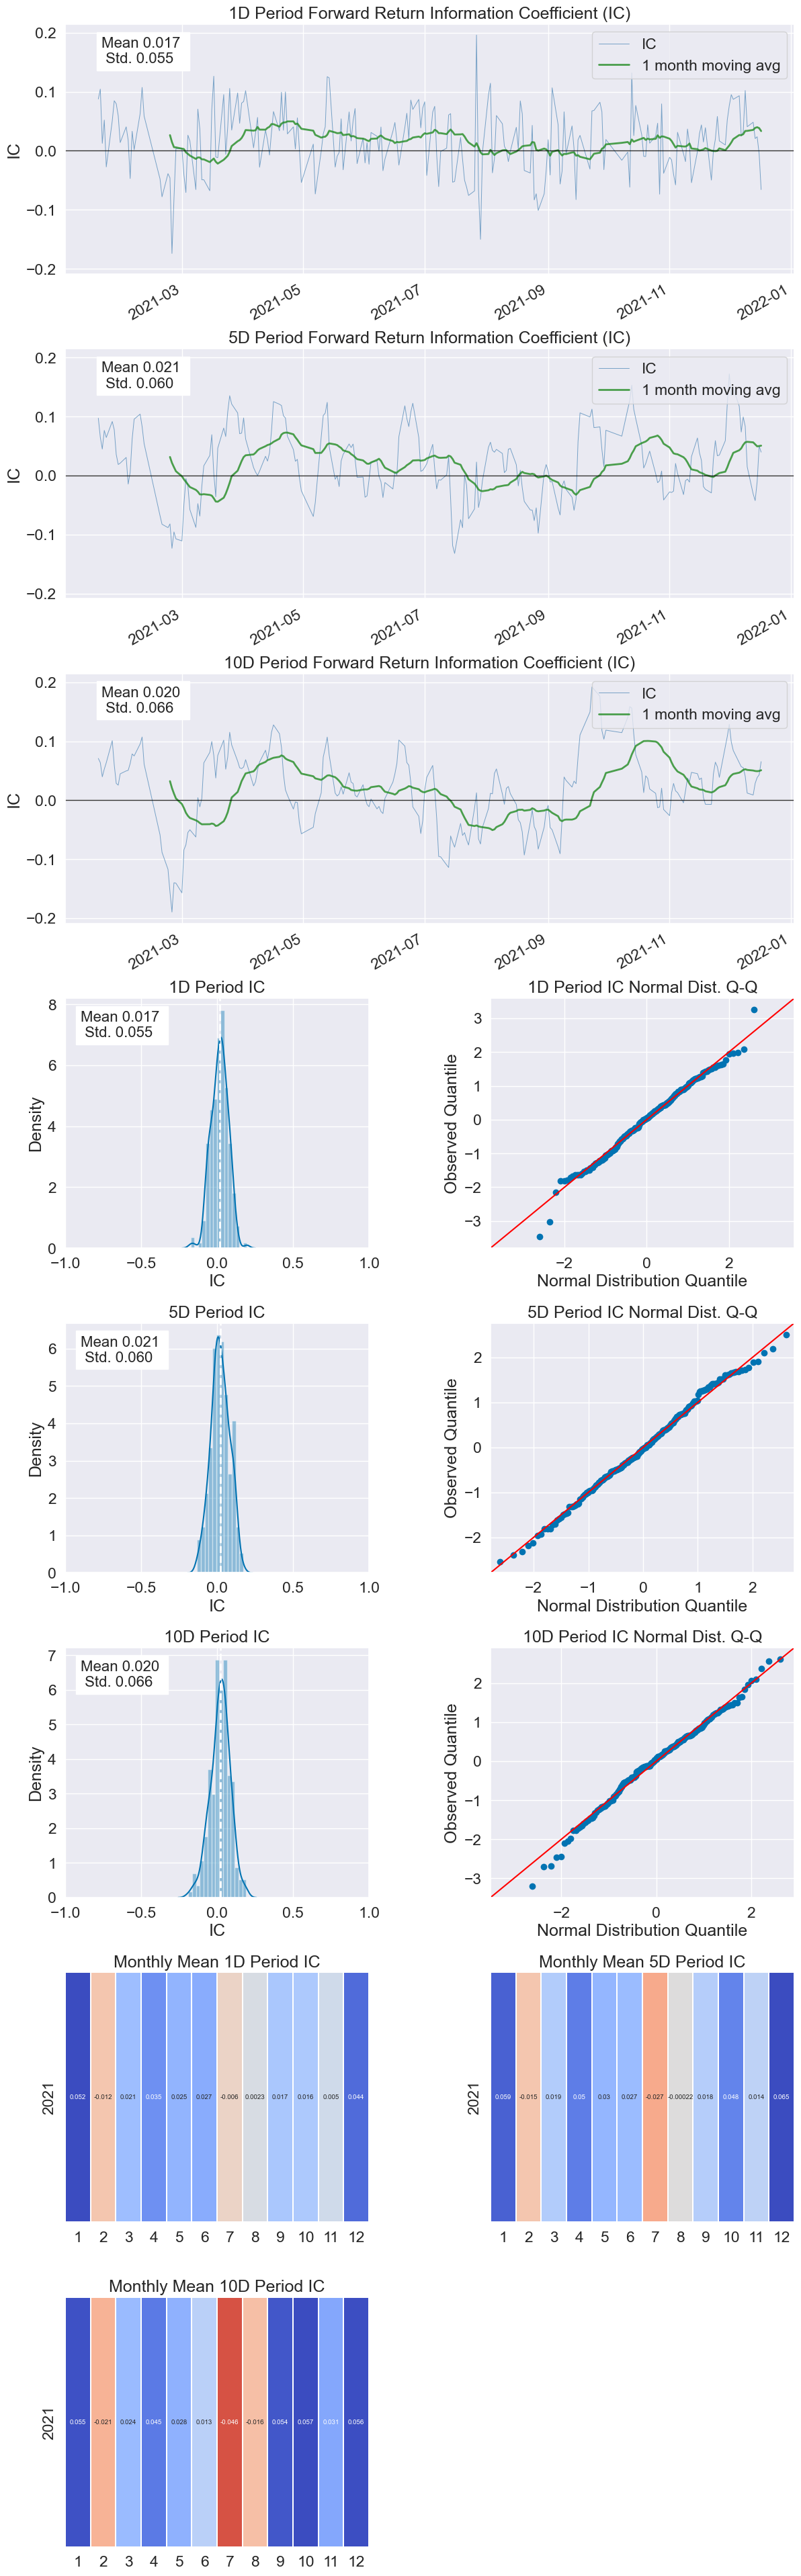

In [24]:
al.tears.create_information_tear_sheet(factor_data,
                                       group_neutral=False,
                                       by_group=False)

## 13.收益率分析

Returns Analysis


,1D,5D,10D
Ann. alpha,-0.015,0.006,0.006
beta,-0.942,-0.918,-0.935
Mean Period Wise Return Top Quantile (bps),5.626,8.714,9.029
Mean Period Wise Return Bottom Quantile (bps),7.687,7.474,8.248
Mean Period Wise Spread (bps),-2.061,1.280,0.851


<Figure size 640x480 with 0 Axes>

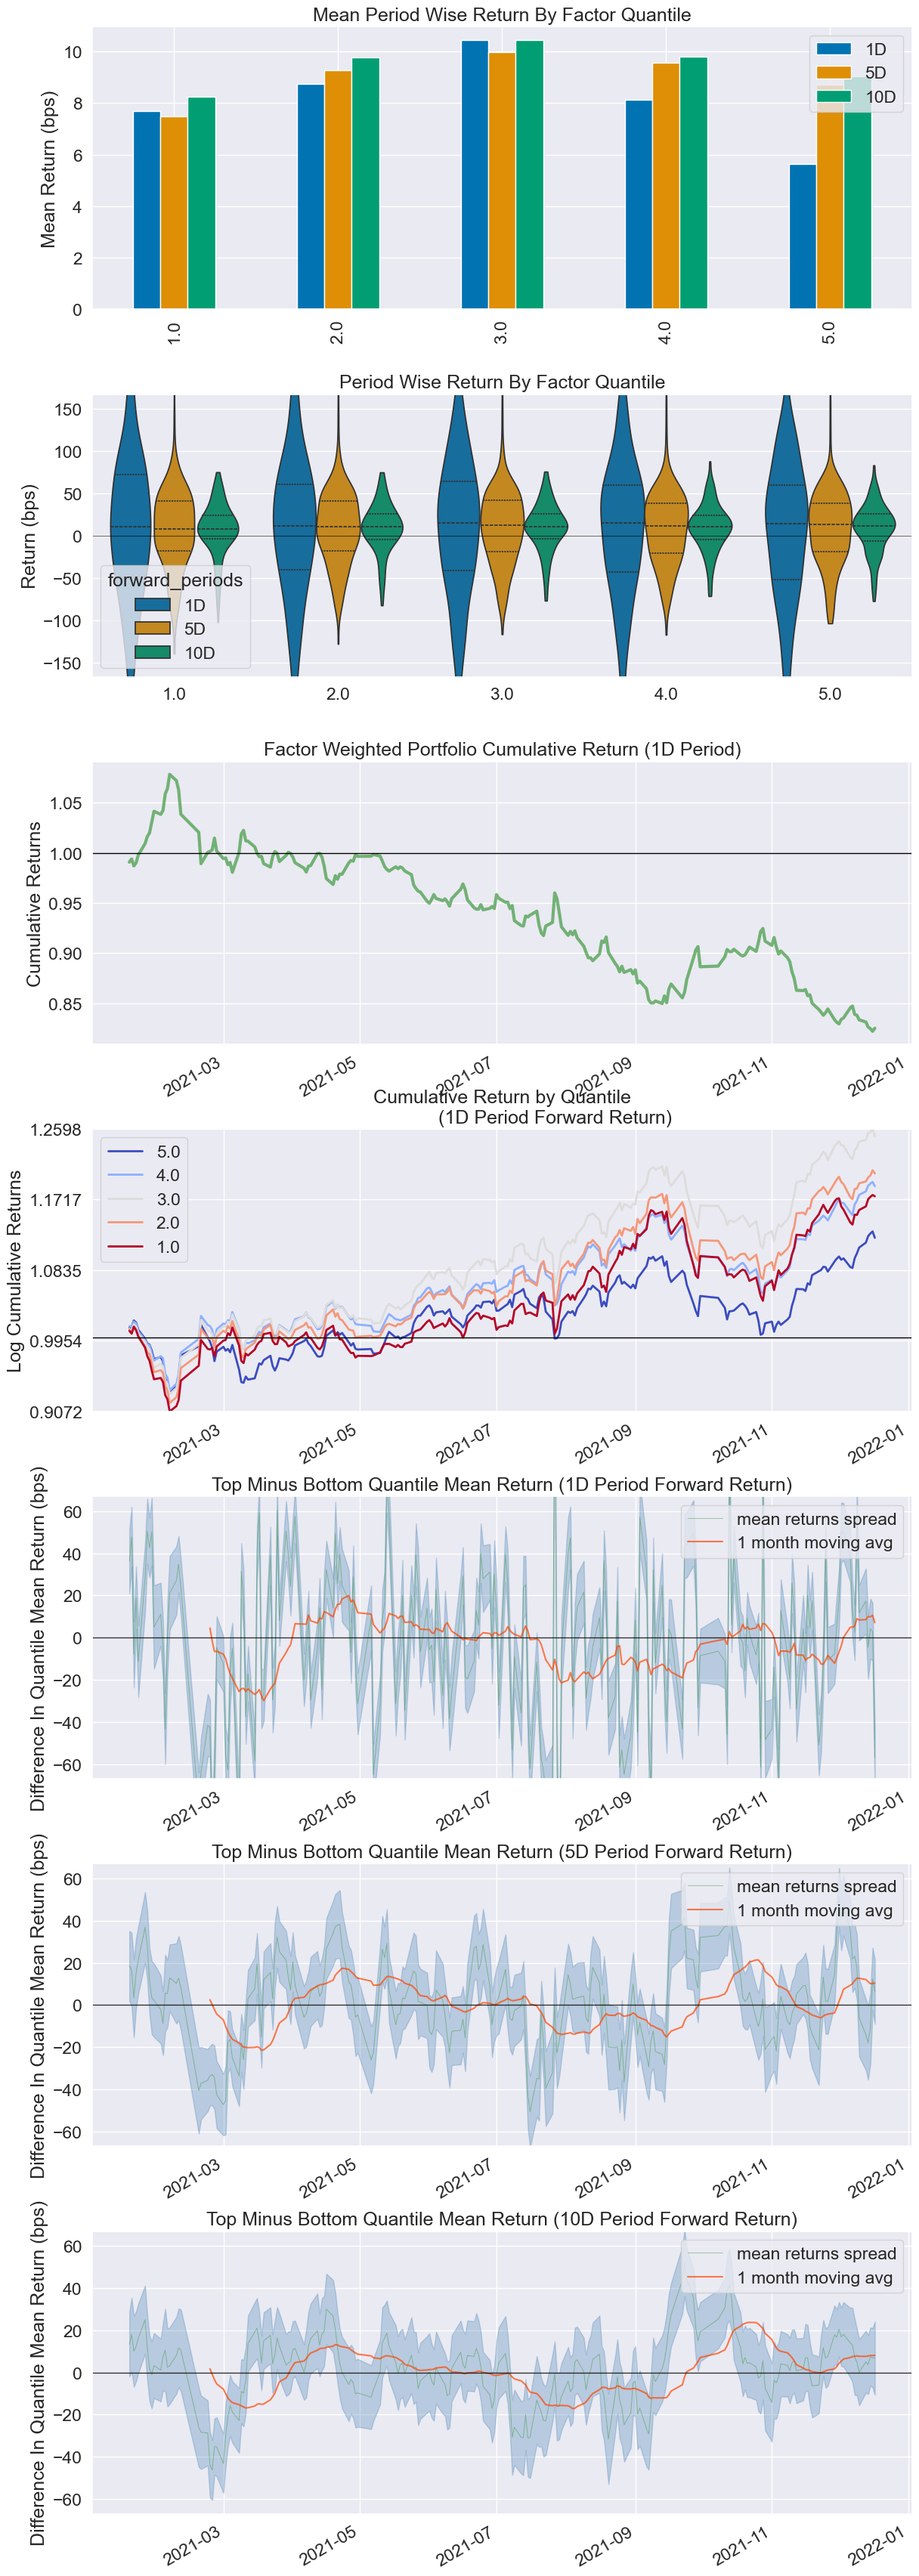

In [25]:
al.tears.create_returns_tear_sheet(factor_data,
                                   long_short=False,
                                   group_neutral=False)

## 14.获取收益序列

In [26]:
mean_quant_ret_bydate, std_quant_daily = perf.mean_return_by_quantile(
    factor_data, by_date=True, by_group=False, demeaned=False
)

In [27]:
mean_quant_rateret_bydate = mean_quant_ret_bydate.apply(
    al.utils.rate_of_return,
    axis=0,
    base_period=mean_quant_ret_bydate.columns[0],
)
mean_quant_rateret_bydate

1D        5D       10D
factor_quantile date                                    
1.0             2021-01-18  0.008005  0.000019 -0.004573
                2021-01-19 -0.003648 -0.003743 -0.005133
                2021-01-20  0.008775 -0.003917 -0.005145
                2021-01-21 -0.004368 -0.007478 -0.008054
                2021-01-22 -0.008009 -0.009547 -0.008564
...                              ...       ...       ...
5.0             2021-12-13  0.005555  0.001570  0.000466
                2021-12-14  0.007159  0.000433  0.000656
                2021-12-15  0.003015  0.001798  0.000555
                2021-12-16  0.002262  0.001908  0.000876
                2021-12-17 -0.007025  0.000048  0.001576

[1115 rows x 3 columns]

## 15.换手率分析

Turnover Analysis


,1D,5D,10D
Quantile 1.0 Mean Turnover,0.228,0.743,0.771
Quantile 2.0 Mean Turnover,0.368,0.786,0.793
Quantile 3.0 Mean Turnover,0.421,0.795,0.801
Quantile 4.0 Mean Turnover,0.421,0.783,0.790
Quantile 5.0 Mean Turnover,0.272,0.722,0.777


,1D,5D,10D
Mean Factor Rank Autocorrelation,0.824,0.161,0.073


<Figure size 640x480 with 0 Axes>

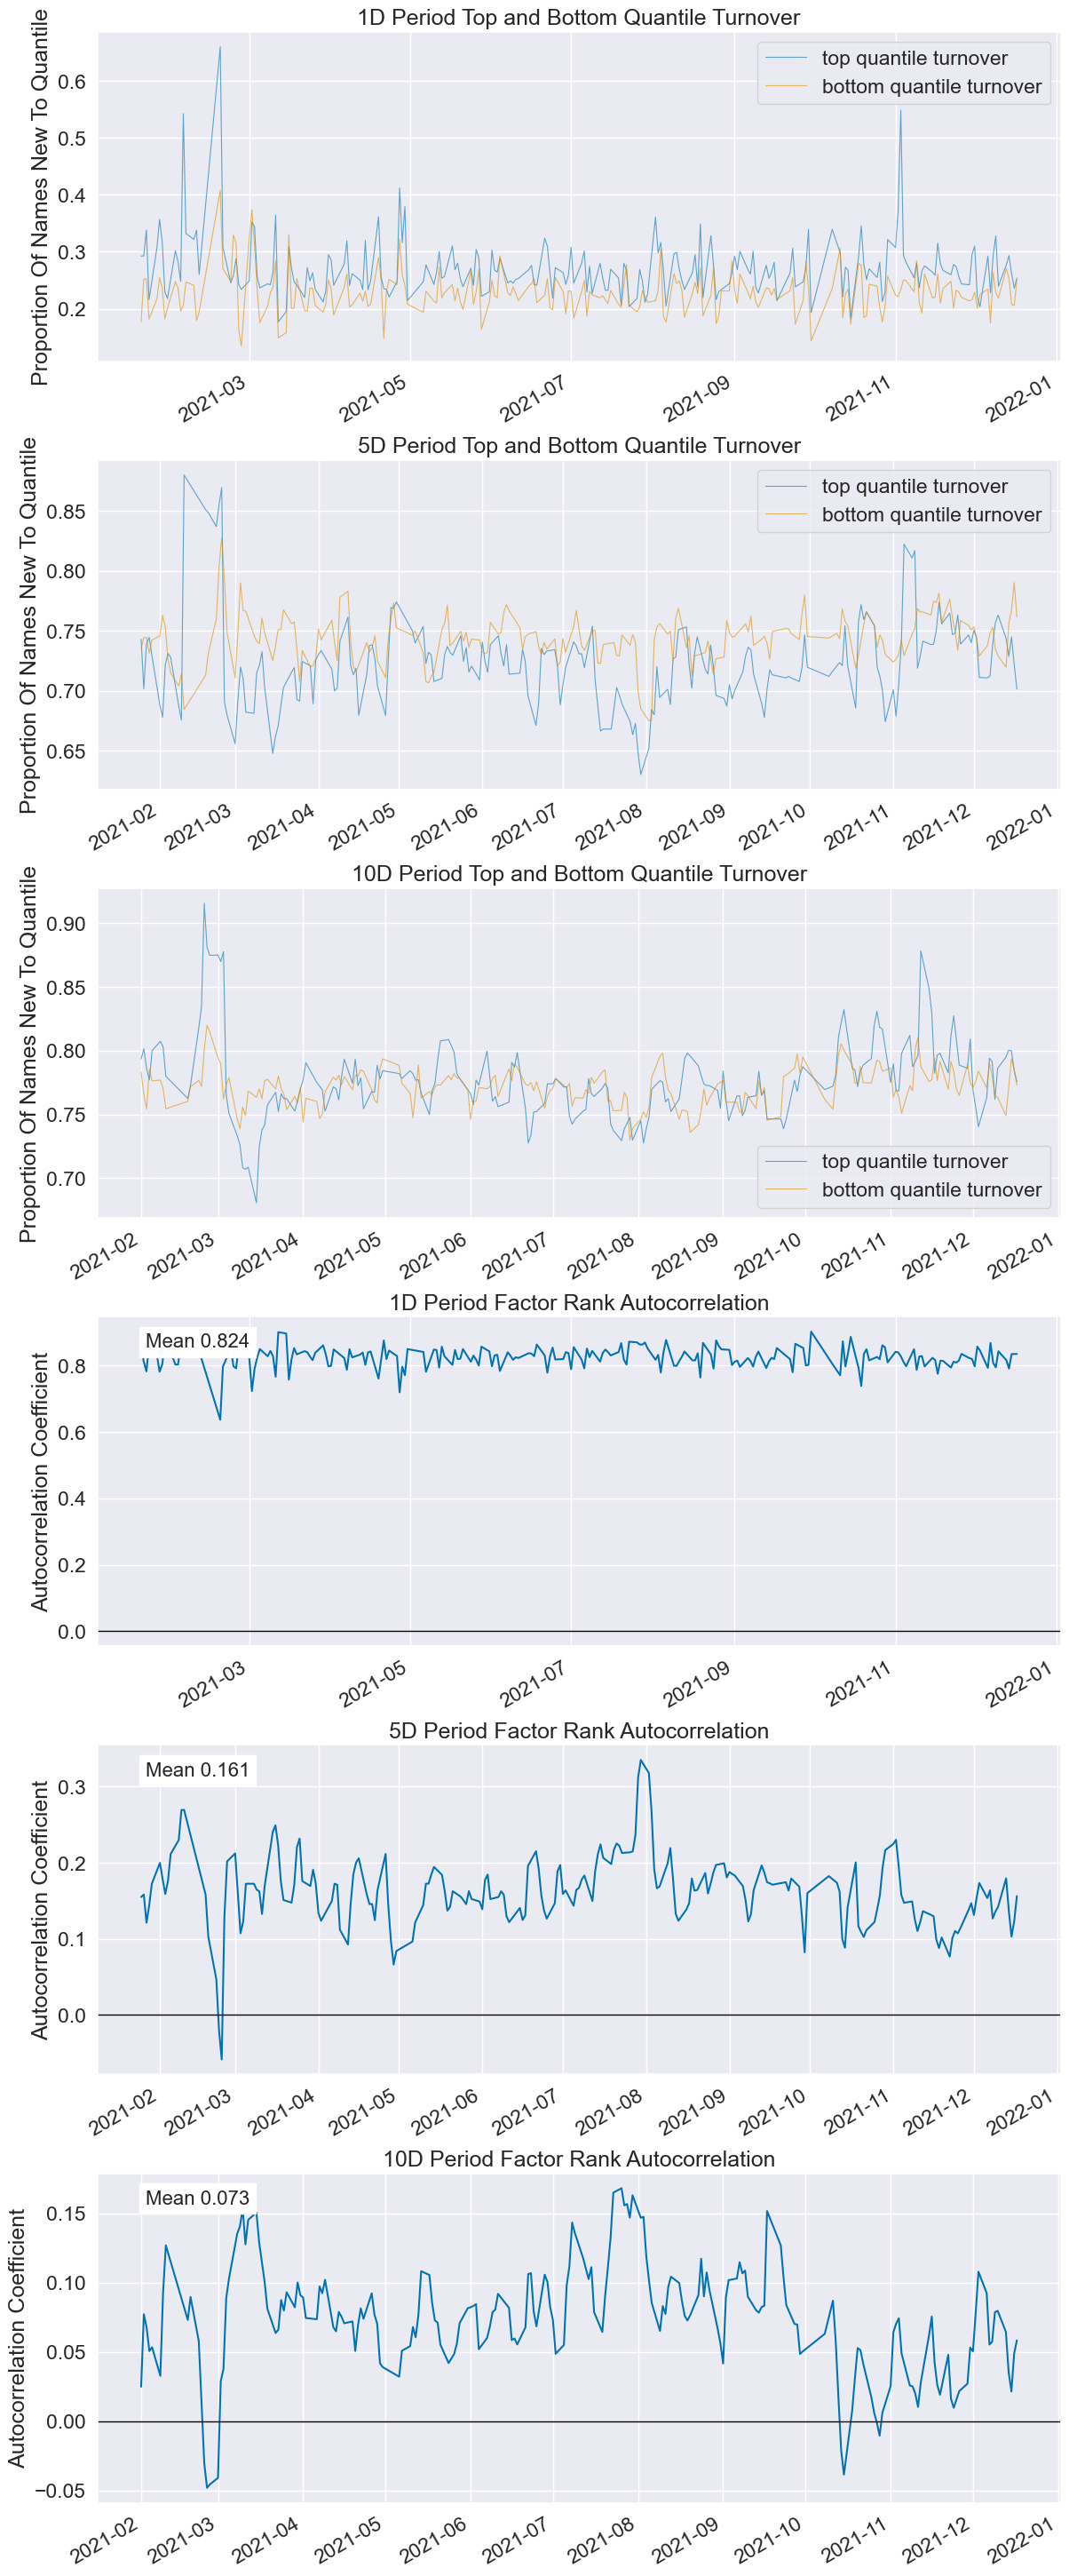

In [28]:
al.tears.create_turnover_tear_sheet(factor_data,turnover_periods=['1D','5D','10D'])